In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import datasets

In [38]:
dataSet = pd.read_csv("trainingSetLDA.csv") 
dataSet['numLabels'] = np.where(dataSet['Label'].isin(['male']), 1., 0.)
dataSet.head()

Height     Weight   ShoeSize   Label  numLabels
0  174.349910  61.650229  39.510609  female        0.0
1  164.935084  59.997600  38.733729  female        0.0
2  160.013237  64.090579  41.050770  female        0.0
3  164.167748  62.141069  45.760832  female        0.0
4  164.501485  47.480263  38.060959  female        0.0

In [4]:
pcf = PCA(n_components=2)
fitResult = pcf.fit_transform(dataSet[['Height','Weight', 'ShoeSize']], dataSet["numLabels"])
fitResult

array([[ -5.86466723,   3.0264546 ],
       [  2.52465938,   0.1752743 ],
       [  3.39307264,  -2.59151445],
       ...,
       [-11.5412762 ,  -1.12837235],
       [ -4.75664872,   3.10361807],
       [ -9.47325369,   3.28685132]])

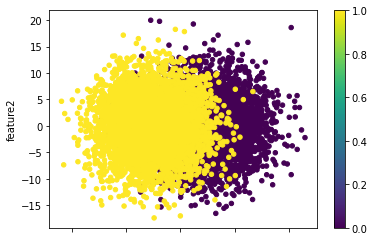

In [5]:
pcaDF = pd.DataFrame(fitResult, columns=['feature1','feature2'])
pcaDF.plot.scatter(x="feature1", y="feature2",c=dataSet["numLabels"], colormap='viridis')

In [6]:
dataSet["numLabels"].unique()

array([0, 1])

In [43]:
ldaFit = LinearDiscriminantAnalysis(n_components=2)
att2 = dataSet.drop(["Label","numLabels"], axis = 1)
ldaFit.fit(att2, dataSet["numLabels"])
att2

Height     Weight   ShoeSize
0     174.349910  61.650229  39.510609
1     164.935084  59.997600  38.733729
2     160.013237  64.090579  41.050770
3     164.167748  62.141069  45.760832
4     164.501485  47.480263  38.060959
...          ...        ...        ...
9995  169.493128  55.953592  45.142210
9996  173.733329  65.211794  51.194405
9997  174.645909  67.584361  45.765471
9998  171.147090  64.835397  39.094836
9999  172.072029  71.490557  41.008101

[10000 rows x 3 columns]

In [44]:
out = ldaFit.transform(att2)
out.shape

(10000, 1)

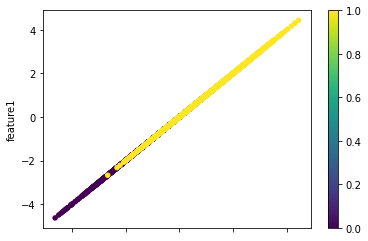

In [12]:
ldaDF = pd.DataFrame(out, columns=['feature1'])
ldaDF.plot.scatter(x="feature1", y=0,c=dataSet["numLabels"], colormap='viridis')

In [29]:
#create a pipeline with Standard scaler and LDA
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))
out2 = lda.fit_transform(dataSet[['Height','Weight', 'ShoeSize']], dataSet["numLabels"])
out2

array([[ 1.19494489],
       [-0.50529846],
       [-0.69591929],
       ...,
       [ 2.31759514],
       [ 0.96704249],
       [ 1.90982807]])

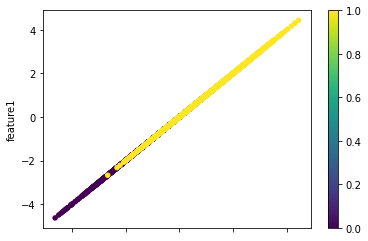

In [15]:
ldaDF2 = pd.DataFrame(out2, columns=['feature1'])
ldaDF2.plot.scatter(x="feature1", y=0,c=dataSet["numLabels"], colormap='viridis')

In [25]:

X, y = datasets.load_digits(return_X_y=True)
digitsDF = pd.DataFrame(X)
digitsDF.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [34]:
ldaFit2 = LinearDiscriminantAnalysis(n_components=2)
out = ldaFit2.fit_transform(digitsDF, y)
out

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]])

In [33]:
out = ldaFit2.transform(digitsDF)
out

array([[-2.0146322 , -5.62348616],
       [ 0.2209674 ,  3.59240033],
       [ 2.23485453,  2.70950363],
       ...,
       [-1.04697178,  1.48367733],
       [ 0.40787292, -1.99167301],
       [ 0.17414501,  0.88717463]])